![](lcc.jpg)

# Ejemplo de Sezgo y Varianza visto en clase

## Reconocimiento de Patrones, 2023-2

## Licenciatura en Ciencia de la Computación

**Julio Waissman**

[Abrir en google Colab](https://colab.research.google.com/github/mcd-unison/aaa-curso/blob/main/ejemplos/reg_lineal.ipynb)

In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16,8)
plt.style.use('ggplot')

Vamos a asumir la función

$$
f(x) = \sin(2\pi x), \quad x \in [0, 2\pi]
$$

y generar unos 500 puntos para su graficación

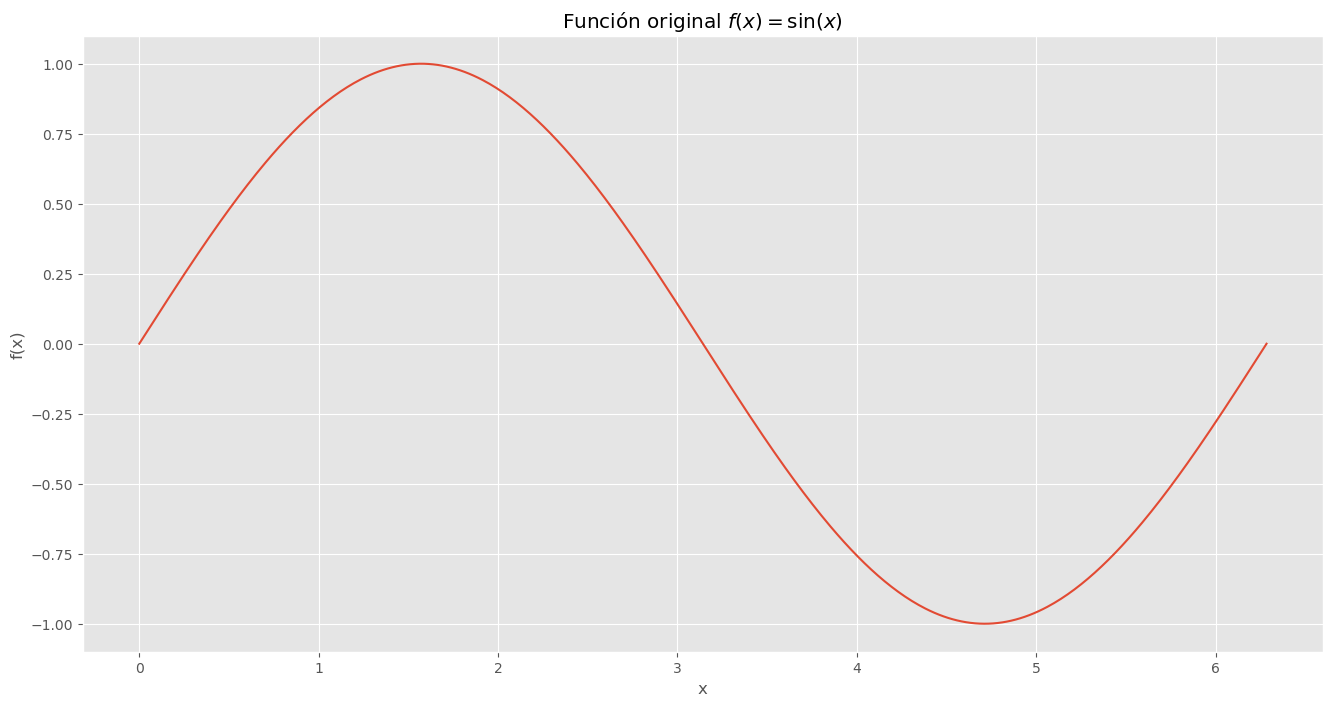

In [19]:
x = np.linspace(0, 2 * np.pi, 500)
y = np.sin(x)

plt.plot(x, y)
plt.title(r"Función original $f(x) = \sin(x)$")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Vamos a hora a calcular dos posibles hipótesis:

1. $h_1(x) = a$
2. $h_2(x) = mx + b$

y vamos a asumir que se obtienen los parametros a partir de un conjunto de datos de entrenamiento con únicamente dos datos

$$
\mathcal{D} = \{(x_1, y_1), (x_2, y_2)\}.
$$


Así, de forma óptima los valores ideales de mis parámetros están dads por:

$$
a^* = \frac{y_1 + y_2}{2},
$$

$$
m^* = \frac{y_1 - y_2}{x_1 - x_2},
$$

$$
b^* = y_1 - m^* x_1
$$

y a partir de ahí vamos a calcular las hipótesis medias.

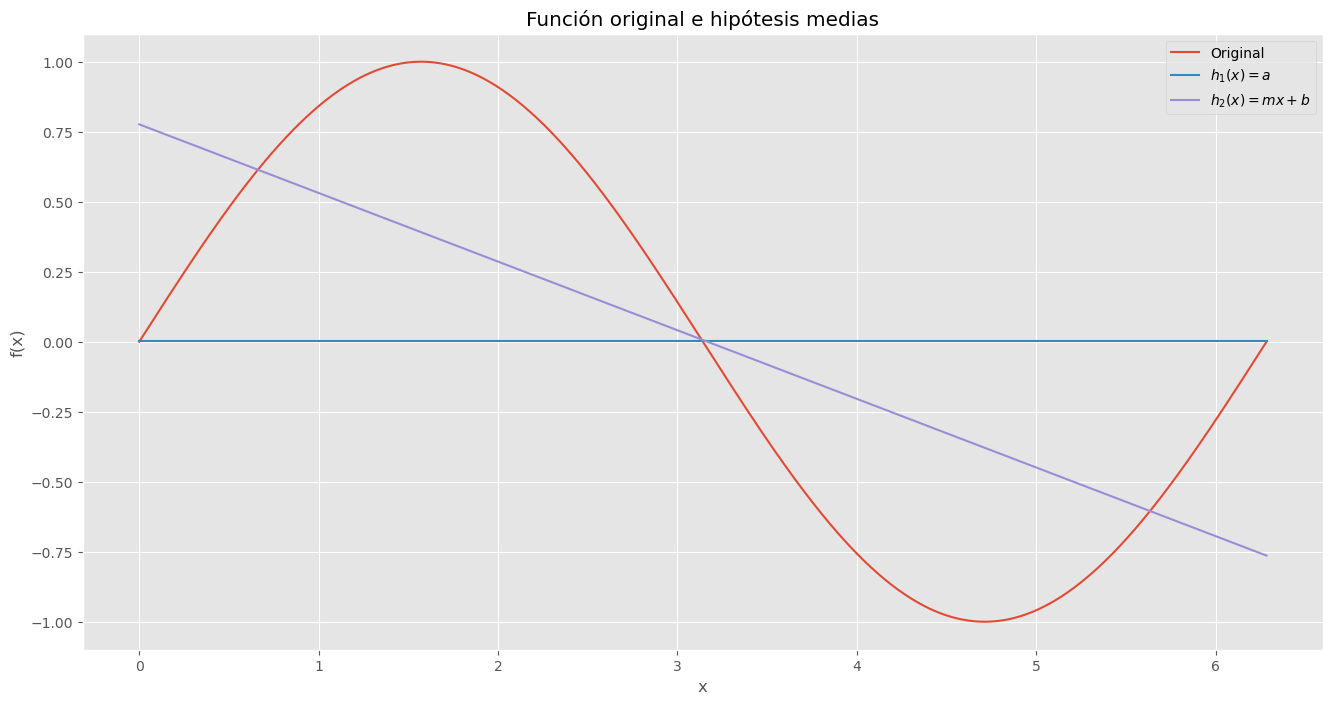

In [25]:
iteraciones = 10_000

h1 = np.zeros((500, iteraciones))
h2 = np.zeros((500, iteraciones))

for iter in range(iteraciones): 
    x1 = 2 * np.pi * np.random.rand()
    x2 = 2 * np.pi * np.random.rand()
    
    y1 = np.sin(x1)
    y2 = np.sin(x2)
    
    a = (y1 + y2) / 2
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    
    h1[:, iter] = np.ones((500,)) * a
    h2[:, iter] = m * x + b 
    
h_media_1 = h1.mean(axis=1)
h_media_2 = h2.mean(axis=1)

plt.plot(x, y, label="Original")
plt.plot(x, h_media_1, label=r"$h_1(x) = a$")
plt.plot(x, h_media_2, label=r"$h_2(x) = mx +b$")
plt.title(r"Función original e hipótesis medias")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


Ahora vamos a calcular el sesgo 

In [23]:
sesgo_h1 = np.square(y - h_media_1).mean()
sesgo_h2 = np.square(y - h_media_2).mean()

print(f"sesgo del modelo h_1 = {sesgo_h1} y del modelo h_2 = {sesgo_h2}")

sesgo del modelo h_1 = 0.4990028440482453 y del modelo h_2 = 0.20828501395369955


y la varianza del modelo

In [30]:
var_h1 = np.var(h1, axis=1).mean()
var_h2 = np.var(h2, axis=1).mean()

print(f"Varianza del modelo h_1 = {var_h1} y del modelo h_2 = {var_h2}")

Varianza del modelo h_1 = 0.25056621215485586 y del modelo h_2 = 1.697832642390513
